# **DATA ANALYSIS**

### `Setup Init`

In [442]:
from scipy.stats import chi2_contingency 
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro 
import phik

import warnings
warnings.filterwarnings("ignore")

### `Load DataSet`

In [443]:
df = pd.read_csv('cleaned_data_fix.csv')
df

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone,trip_dayname,trip_time_period,PUDO,trip_dayname_cat,trip_datename
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,661.0,1.0,166,143,1.0,2.580000,14.90,1.0,0.5,4.03,0.0,1.0,...,1.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Morningside Heights - Lincoln Square West,Manhattan - Manhattan,Boro Zone - Yellow Zone,7. Minggu,9 malem - 3 pagi,166-143,Weekend,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,406.0,1.0,24,43,1.0,1.810000,10.70,1.0,0.5,2.64,0.0,1.0,...,1.0,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,Bloomingdale - Central Park,Manhattan - Manhattan,Yellow Zone - Yellow Zone,7. Minggu,9 malem - 3 pagi,24-43,Weekend,2023-01-01
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,380.0,1.0,223,179,1.0,0.000000,3.00,1.0,0.5,1.94,0.0,1.0,...,1.0,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,Steinway - Old Astoria,Queens - Queens,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,223-179,Weekend,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,349.0,1.0,41,238,1.0,1.300000,6.50,0.5,1.5,1.70,0.0,1.0,...,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,Central Harlem - Upper West Side North,Manhattan - Manhattan,Boro Zone - Yellow Zone,7. Minggu,9 malem - 3 pagi,41-238,Weekend,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,358.0,1.0,41,74,1.0,1.100000,6.00,0.5,1.5,0.00,0.0,1.0,...,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,Central Harlem - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,41-74,Weekend,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67301,2,2023-01-31 22:29:00,2023-01-31 22:42:00,780.0,1.0,49,62,1.0,2.563507,15.70,0.0,0.0,0.00,0.0,1.0,...,3.0,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone,Clinton Hill - Crown Heights South,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,9 malem - 3 pagi,49-62,Weekday,2023-01-31
67302,2,2023-01-31 22:40:00,2023-01-31 22:48:00,480.0,1.0,10,205,1.0,2.140000,4.41,0.0,0.0,0.00,0.0,1.0,...,3.0,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone,Baisley Park - Saint Albans,Queens - Queens,Boro Zone - Boro Zone,2. Selasa,9 malem - 3 pagi,10-205,Weekday,2023-01-31
67303,2,2023-01-31 23:46:00,2023-02-01 00:02:00,960.0,1.0,66,37,1.0,3.440000,16.53,0.0,0.0,3.51,0.0,1.0,...,3.0,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone,DUMBO/Vinegar Hill - Bushwick South,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,9 malem - 3 pagi,66-37,Weekday,2023-01-31
67304,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1080.0,1.0,225,189,1.0,3.030000,14.98,0.0,0.0,3.20,0.0,1.0,...,3.0,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone,Stuyvesant Heights - Prospect Heights,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,9 malem - 3 pagi,225-189,Weekday,2023-01-31


In [444]:
# Cek format, tipe, missing value, dan unique value pada dataset
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,n_unique,sample_unique
0,VendorID,int64,0.0,2,"[2, 1]"
1,pickup_datetime,object,0.0,65888,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-0..."
2,dropoff_datetime,object,0.0,65824,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-0..."
3,trip_duration_seconds,float64,0.0,3592,"[661.0, 406.0, 380.0, 349.0, 358.0, 1053.0, 1045.0, 777.0, 297.0, 1390.0, 1531.0, 505.0, 1139.0, 694.0, 2314.0, 1129.0, 532.0, 2544.0, 677.0, 433.0, 245.0, 250.0, 563.0, 274.0, 871.0, 1013.0, 723...."
4,RatecodeID,float64,0.0,4,"[1.0, 5.0, 2.0, 3.0]"
5,PULocationID,int64,0.0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 33, 226, 52, 169, 36, 157, 43, 256, 17..."
6,DOLocationID,int64,0.0,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168,..."
7,passenger_count,float64,0.0,6,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
8,trip_distance,float64,0.0,1799,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74..."
9,fare_amount,float64,0.0,2379,"[14.9, 10.7, 3.0, 6.5, 6.0, 17.7, 19.1, 14.2, 7.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, ..."


### `Introduction`

Taksi hijau (Green Cab/ Boro Taxis) adalah salah satu jenis kendaraan umum di Kota New York untuk melayani perjalanan penumpang dari suatu tempat ke tempat lain. Taksi hijau ini mulai beroperasi sejak bulan Agustus 2013 dan dilisensikan oleh TLC (Taxi and Limousine Commission), sebuah badan pemerintahan di Kota New York. Permintaan layanan perjalanan dari taksi ini bisa dipesan langsung di jalan (street-hail) atau dipesan melalui panggilan ke pangkalan (dispatch). Zona perjalanan yang dapat dilalui oleh taksi hijau tersebar di beberapa wilayah (borough) Kota New York, yaitu Manhattan, Bronx, Brooklyn, Queens, dan Staten Island. Aturan zona perjalanan untuk taksi hijau dapat dilihat melalui link berikut: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page. 

### `Problem Background`

Dari data yang sudah dilakukan cleaning sebelumnya, penulis tertarik untuk mengamati rute perjalanan yang sering dilalui taksi hijau untuk setiap wilayah (Borough) dengan periode perjalanan dimulai dari tanggal 1 Januari - 31 Januari 2023. Informasi awal yang ingin didapatkan yaitu apakah rute perjalanan yang sering dilalui taksi untuk setiap wilayah, terpusat di satu lokasi, dua lokasi, atau bahkan lebih. Ada kemungkinan dimana rute perjalanan terpusat pada 2 lokasi 'bolak-balik' yaitu rute perjalanan yang sering dilalui dari A ke B dan sebaliknya dari B ke A. Jika temuan (insight) tersebut benar adanya maka temuan ini mungkin akan berguna bagi supir taksi hijau (stakeholder) dalam menentukan lokasi yang tepat untuk mencari penumpang sehingga dapat memaksimalkan pesanan yang diterima, tentunya dengan mengikuti aturan zona perjalanan yang telah ditentukan. Sebagai ilustrasi ketika supir taksi telah mengantarkan penumpang dari tempat A ke tempat B, tidak butuh waktu yang lama supir taksi mendapatkan pesanan kembali dari tempat B ke tempat A, begitu juga sebaliknya. Tentu terdapat faktor luar yang dapat mempengaruhi cepat lambatnya supir taksi mendapatkan pesanan salah satunya dari banyaknya mobil yang tersedia di suatu lokasi atau wilayah, namun dalam analisis ini kita dapat mengesampingkan faktor-faktor tersebut (Project Limitation). Hasil dari analisis yang dilakukan mungkin akan berdampak pada jumlah mobil yang dapat mengalami penumpukkan di suatu lokasi, namun hasil analisis ini semata-mata hanya untuk memberikan informasi secara umum bahwa dalam mencari penumpang ada kemungkinan (peluang) supir taksi lebih cepat dalam mendapatkan pesanan dengan melihat riwayat perjalanan yang telah dilakukan sebelumnya di lokasi tersebut.


### `Business Problem`

Banyaknya pesanan yang diterima oleh supir taksi hijau tentunya tidak lepas dari bagaimana cara supir taksi hijau mendapatkan penumpang. Terdapat dua cara supir taksi hijau mendapatkan penumpang yaitu dengan langsung mencari penumpang di pinggir jalan atau menunggu pesanan masuk dari penumpang di suatu pangkalan. Tentunya cara-cara tersebut bisa dimaksimalkan dengan memperhatikan kondisi (tempat dan waktu) agar lebih cepat mendapatkan penumpang. Sebagai seorang supir taksi tentunya ingin memaksimalkan pesanan yang diterima dari segi waktu untuk mendapatkan pesanan kembali.

### `Business Task`

Menentukan kondisi yang tepat bagi supir taksi hijau agar lebih dapat memaksimalkan pesanan yang diterima untuk setiap masing-masing wilayah (Borough) dengan melihat riwayat perjalanan taksi hijau di bulan Januari.

### `STEP 1`

#### Membagi data perjalanan taksi hijau berdasarkan lokasi pickup dan dropoff untuk masing-masing wilayah (Borough) sesuai service zone (Boro Zone)

In [445]:
# Terdapat 5 Borough atau wilayah di Kota New York yaitu Manhattan, Queens, Brooklyn, dan Bronx

#Data perjalanan dalam wilayah Manhattan
M=df[(df.PULocationID.isin([41,  42,  74,  75, 116, 120, 127, 128, 152, 153, 166, 202, 243,
       244])) & (df.DOLocationID.isin([41,  42,  74,  75, 116, 120, 127, 128, 152, 153, 166, 202, 243,
        244]))]
#Data perjalanan dalam wilayah Queens
Q=df[(df.PULocationID.isin([2,   7,   8,   9,  10,  15,  16,  19,  27,  28,  30,  38,  53,
         56,  57,  64,  70,  73,  82,  83,  86,  92,  93,  95,  96,  98,
        101, 102, 117, 121, 122, 124, 129, 130, 131, 134, 135, 139, 145,
        146, 157, 160, 171, 173, 175, 179, 180, 191, 192, 193, 196, 197,
        198, 201, 203, 205, 207, 215, 216, 218, 219, 223, 226, 252, 253,
        258, 260])) & (df.DOLocationID.isin([2,   7,   8,   9,  10,  15,  16,  19,  27,  28,  30,  38,  53,
         56,  57,  64,  70,  73,  82,  83,  86,  92,  93,  95,  96,  98,
        101, 102, 117, 121, 122, 124, 129, 130, 131, 134, 135, 139, 145,
        146, 157, 160, 171, 173, 175, 179, 180, 191, 192, 193, 196, 197,
        198, 201, 203, 205, 207, 215, 216, 218, 219, 223, 226, 252, 253,
        258, 260]))]
#Data perjalanan dalam wilayah Brooklyn
B=df[(df.PULocationID.isin([11,  14,  17,  21,  22,  25,  26,  29,  33,  34,  35,  36,  37,
         39,  40,  49,  52,  54,  55,  61,  62,  63,  65,  66,  67,  71,
         72,  76,  77,  80,  85,  89,  91,  97, 106, 108, 111, 112, 123,
        133, 149, 150, 154, 155, 165, 177, 178, 181, 188, 189, 190, 195,
        210, 217, 222, 225, 227, 228, 255, 256, 257])) & (df.DOLocationID.isin([11,  14,  17,  21,  22,  25,  26,  29,  33,  34,  35,  36,  37,
         39,  40,  49,  52,  54,  55,  61,  62,  63,  65,  66,  67,  71,
         72,  76,  77,  80,  85,  89,  91,  97, 106, 108, 111, 112, 123,
        133, 149, 150, 154, 155, 165, 177, 178, 181, 188, 189, 190, 195,
        210, 217, 222, 225, 227, 228, 255, 256, 257]))]
#Data perjalanan dalam wilayah Bronx
Bro=df[(df.PULocationID.isin([3,  18,  20,  31,  32,  46,  47,  51,  58,  59,  60,  69,  78,
         81,  94, 119, 126, 136, 147, 159, 167, 168, 169, 174, 182, 183,
        184, 185, 199, 200, 208, 212, 213, 220, 235, 240, 241, 242, 247,
        248, 250, 254, 259])) & (df.DOLocationID.isin([3,  18,  20,  31,  32,  46,  47,  51,  58,  59,  60,  69,  78,
         81,  94, 119, 126, 136, 147, 159, 167, 168, 169, 174, 182, 183,
        184, 185, 199, 200, 208, 212, 213, 220, 235, 240, 241, 242, 247,
        248, 250, 254, 259]))]
#Data perjalanan dalam wilayah Staten Island
S=df[(df.PULocationID.isin([5,   6,  23,  44,  84,  99, 109, 110, 115, 118, 156, 172, 176,
        187, 204, 206, 214, 221, 245, 251])) & (df.DOLocationID.isin([5,   6,  23,  44,  84,  99, 109, 110, 115, 118, 156, 172, 176,
        187, 204, 206, 214, 221, 245, 251]))]

Data perjalanan dalam wilayah Manhattan, Queens, Brooklyn, Bronx, dan Staten Island berturut-turut sebanyak 16508 trip atau sekitar 24,5% dari total perjalanan, 15018 trip atau sekitar 22,3% dari total perjalanan, 6972 trip atau sekitar 10,3% dari total perjalanan, 801 trip atau sekitar 1,2% dari total perjalanan, dan 9 trip atau sekitar 0,01% dari total perjalanan. Jika ditotal sekitar 58,31% trip dari total perjalanan yang dilakukan di dalam wilayahnya masing-masing. Sisanya sekitar 41,69% trip dari total perjalanan, kemungkinan didapatkan dari perjalanan dari dan ke bandara (airport), perjalanan antar wilayah, dan perjalanan dari dan ke lokasi yang bukan berada di Boro Zone.

Dengan mempertimbangkan jumlah data (banyaknya trip) yang paling potensial untuk dilakukan analisis, pengolahan data selanjutnya hanya menggunakan Data Perjalanan dalam wilayah Manhattan, Queens, dan Brooklyn.



### `STEP 2`

#### Dengan menggunakan data yang sudah terbagi, selanjutnya kita akan menentukan lokasi pickup dan dropoff suatu perjalanan yang sering dilalui untuk masing-masing wilayah, tentunya dengan mempertimbangkan banyaknya perjalanan yang dilakukan.

In [446]:
#Cek banyaknya perjalanan untuk setiap titik lokasi (dari lokasi pickup ke lokasi dropoff) perjalanan di Manhattan
M.PUDO.value_counts().sort_values()

PUDO
120-152       1
75-153        1
74-202        1
116-120       1
153-42        1
           ... 
74-74       808
74-166      935
74-41       967
75-74      1453
74-75      2000
Name: count, Length: 135, dtype: int64

Titik lokasi perjalanan di Manhattan yang akan dilakukan analisis yaitu dari lokasi ID 74 ke lokasi ID 75 dan dari lokasi ID 75 ke lokasi ID 74. Dugaan awal benar ternyata terdapat titik perjalanan yang dapat dikatakan bolak-balik di suatu wilayah.

In [447]:
#Cek banyaknya perjalanan untuk setiap titik lokasi perjalanan di Queens
Q.PUDO.value_counts().sort_values()

PUDO
10-205        1
28-216        1
9-134         1
121-9         1
121-93        1
           ... 
129-129     381
82-82       440
82-129      468
7-7         469
95-95      1199
Name: count, Length: 867, dtype: int64

Titik lokasi perjalanan di Queens yang akan dilakukan analisis yaitu dari lokasi ID 95 ke lokasi ID 95.

In [448]:
#Cek banyaknya perjalanan untuk setiap titik lokasi perjalanan di Brooklyn
B.PUDO.value_counts().sort_values()

PUDO
26-25        1
52-256       1
77-181       1
188-67       1
71-21        1
          ... 
210-210    175
97-61      178
97-181     182
97-97      273
97-49      302
Name: count, Length: 1063, dtype: int64

Titik lokasi perjalanan di Brooklyn yang akan dilakukan analisis yaitu dari lokasi ID 97 ke lokasi ID 49 dan lokasi ID 97 ke lokasi ID 97.

### `STEP 3`

#### Menganalisis data perjalanan yang sering dilalui taksi hijau dari lokasi pickup dan dropoff tertentu untuk masing-masing wilayah

##### Wilayah Manhattan

In [449]:
#Trip perjalanan titik 74-75 di wilayah Manhattan
M74_75=M[M.PUDO=='74-75']
M74_75

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone,trip_dayname,trip_time_period,PUDO,trip_dayname_cat,trip_datename
109,2,2023-01-01 01:40:51,2023-01-01 01:47:06,375.0,1.0,74,75,1.0,1.61,9.30,1.0,0.5,1.55,0.0,1.0,...,1.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,74-75,Weekend,2023-01-01
221,2,2023-01-01 02:58:07,2023-01-01 03:04:41,394.0,1.0,74,75,6.0,1.53,7.00,0.5,0.5,1.66,0.0,0.3,...,1.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,74-75,Weekend,2023-01-01
362,1,2023-01-01 09:01:41,2023-01-01 09:06:34,293.0,1.0,74,75,1.0,1.50,8.60,0.0,1.5,2.50,0.0,1.0,...,1.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,74-75,Weekend,2023-01-01
364,1,2023-01-01 09:41:28,2023-01-01 09:46:27,299.0,1.0,74,75,1.0,1.50,8.60,0.0,1.5,0.00,0.0,1.0,...,1.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,74-75,Weekend,2023-01-01
413,2,2023-01-01 11:07:36,2023-01-01 11:14:46,430.0,1.0,74,75,1.0,1.36,10.00,0.0,0.5,2.30,0.0,1.0,...,1.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,74-75,Weekend,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66361,2,2023-01-25 07:53:00,2023-01-25 07:56:00,180.0,1.0,74,75,1.0,0.44,13.65,0.0,0.0,5.00,0.0,1.0,...,3.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,3. Rabu,3 pagi - 9 pagi,74-75,Weekday,2023-01-25
66528,2,2023-01-26 07:29:00,2023-01-26 07:41:00,720.0,1.0,74,75,1.0,1.60,14.24,0.0,0.0,1.52,0.0,1.0,...,3.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,4. Kamis,3 pagi - 9 pagi,74-75,Weekday,2023-01-26
66553,2,2023-01-26 08:39:00,2023-01-26 08:55:00,960.0,1.0,74,75,1.0,1.93,15.08,0.0,0.0,3.22,0.0,1.0,...,3.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,4. Kamis,3 pagi - 9 pagi,74-75,Weekday,2023-01-26
66749,2,2023-01-27 16:02:00,2023-01-27 16:15:00,780.0,1.0,74,75,1.0,1.53,15.26,0.0,0.0,3.25,0.0,1.0,...,3.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,East Harlem North - East Harlem South,Manhattan - Manhattan,Boro Zone - Boro Zone,5. Jumat,3 sore - 9 malem,74-75,Weekday,2023-01-27


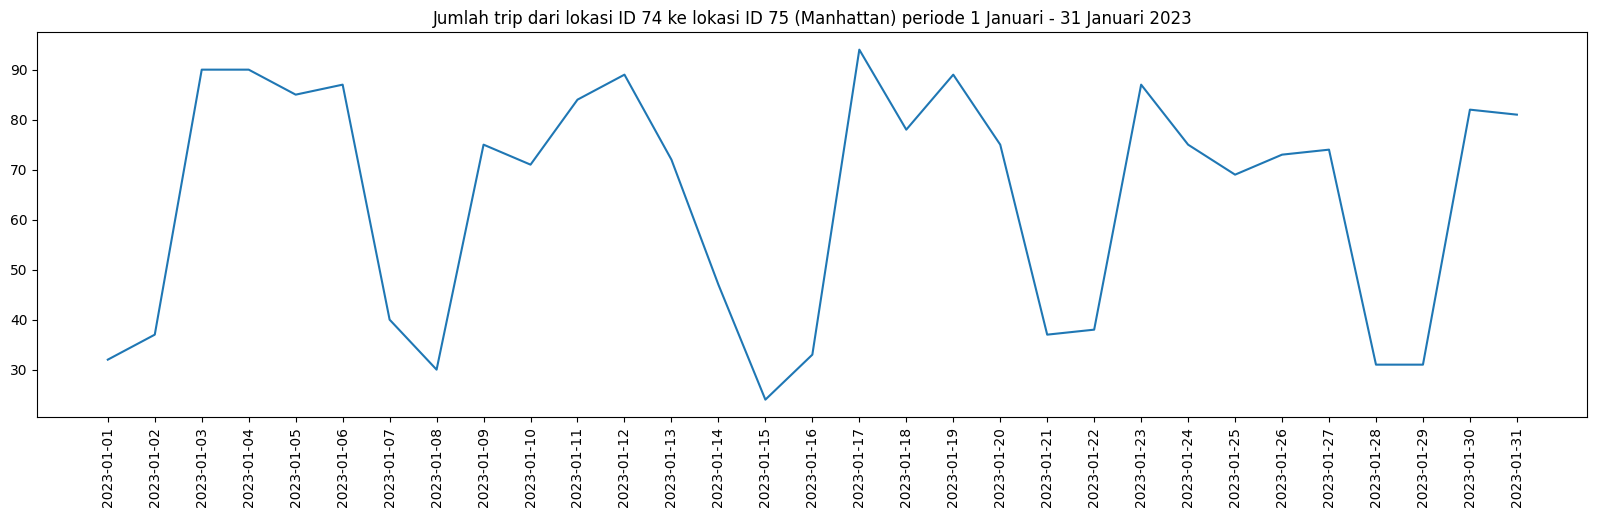

In [450]:
#Line Plot dari jumlah perjalanan (trip) dari lokasi ID 74 ke lokasi ID 75 (Manhattan) selama 1 Bulan
LP74= M74_75[['trip_datename', 'trip_dayname']].groupby('trip_datename').count().reset_index()

plt.figure(figsize=(20,5))

plt.plot(
    LP74['trip_datename'],
    LP74['trip_dayname']
)

plt.xticks(ticks=LP74['trip_datename'], rotation=90)     


plt.title('Jumlah trip dari lokasi ID 74 ke lokasi ID 75 (Manhattan) periode 1 Januari - 31 Januari 2023');

Rata-rata jumlah trip dari titik lokasi tersebut per harinya 2000/31= 64,5 ≈ 65
Hari dengan jumlah trip diatas rata-rata:
Minggu Pertama: Selasa-Jumat
Minggu Kedua : Senin-Jumat
Minggu Ketiga : Selasa-Jumat
Minggu Keempat : Senin-Jumat
Minggu kelima: Senin-Selasa

In [451]:
#Tabel jumlah trip dari lokasi ID 74 ke lokasi ID 75 (Manhattan)
#berdasarkan kategori hari (weekday dan weekend) dan kategori jam (tabel kontigensi)

M74_75[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)
  

trip_time_period,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
trip_dayname_cat,,,,
Weekday,685,344,43,618
Weekend,39,132,34,105


<Axes: xlabel='trip_dayname_cat'>

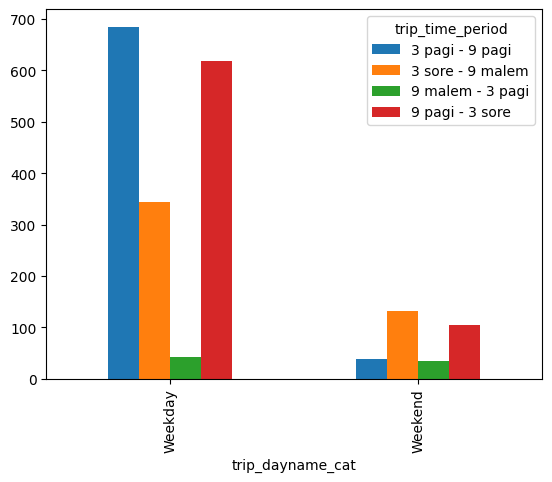

In [452]:
BC1=M74_75[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)
BC1.plot(kind='bar') 
#Berikut BarPlot Count dengan Sumbu Y menyatakan Jumlah Trip

Dugaan awal berdasarkan tabel Kontigensi dan barplot count diatas, jumlah trip terbanyak selama bulan Januari saat supir taksi mulai mengantarkan penumpang dari lokasi ID 74 ke lokasi ID 75 (Manhattan) terjadi di waktu jam 3 pagi - 9 pagi dan 9 pagi - 3 sore. Saat weekdays jumlah trip terbanyak terjadi di waktu jam 3 pagi-9 pagi dan 9 pagi-3 sore, sedangkan saat weekend jumlah trip terbanyak terjadi di waktu jam 9 pagi-3 sore dan 3 sore- 9 malam.

In [453]:
#Tabel Peluang Supir taksi mendapatkan pesanan pada kondisi tertentu
A=np.array([[685,344,43,618],[39,132,34,105]])
Be=np.array([[1/2000],[1/2000]])
D74=A*Be
C=pd.DataFrame(
    D74, columns=['3 pagi - 9 pagi', '3 sore - 9 malem', '9 malem - 3 pagi', '9 pagi - 3 sore'],
    index=['Weekday','Weekend'])
C

,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
Weekday,0.3425,0.172,0.0215,0.3090
Weekend,0.0195,0.066,0.0170,0.0525


In [454]:
#Trip perjalanan titik 75-74 di wilayah Manhattan
M75_74=M[M.PUDO=='75-74']
M75_74

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone,trip_dayname,trip_time_period,PUDO,trip_dayname_cat,trip_datename
20,2,2023-01-01 00:26:21,2023-01-01 00:30:26,245.0,1.0,75,74,1.0,0.96,7.20,1.0,0.5,2.42,0.0,1.0,...,1.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,75-74,Weekend,2023-01-01
32,2,2023-01-01 00:20:23,2023-01-01 00:24:32,249.0,1.0,75,74,2.0,1.39,7.90,1.0,0.5,0.00,0.0,1.0,...,1.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,75-74,Weekend,2023-01-01
81,2,2023-01-01 01:03:59,2023-01-01 01:07:17,198.0,1.0,75,74,1.0,0.53,5.80,1.0,0.5,0.00,0.0,1.0,...,1.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,75-74,Weekend,2023-01-01
328,2,2023-01-01 08:56:08,2023-01-01 09:03:44,456.0,1.0,75,74,1.0,1.13,7.00,0.0,0.5,0.00,0.0,0.3,...,1.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,3 pagi - 9 pagi,75-74,Weekend,2023-01-01
337,2,2023-01-01 09:37:48,2023-01-01 09:40:23,155.0,1.0,75,74,1.0,1.13,6.50,0.0,0.5,0.00,0.0,1.0,...,1.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,75-74,Weekend,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66237,2,2023-01-24 08:13:00,2023-01-24 08:20:00,420.0,1.0,75,74,1.0,1.21,13.65,0.0,0.0,2.20,0.0,1.0,...,3.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,2. Selasa,3 pagi - 9 pagi,75-74,Weekday,2023-01-24
66364,2,2023-01-25 08:08:00,2023-01-25 08:16:00,480.0,1.0,75,74,1.0,1.68,13.65,0.0,0.0,3.00,0.0,1.0,...,3.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,3. Rabu,3 pagi - 9 pagi,75-74,Weekday,2023-01-25
66534,2,2023-01-26 08:03:00,2023-01-26 08:07:00,240.0,1.0,75,74,1.0,1.17,13.65,0.0,0.0,3.00,0.0,1.0,...,3.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,4. Kamis,3 pagi - 9 pagi,75-74,Weekday,2023-01-26
66880,2,2023-01-28 14:40:00,2023-01-28 14:47:00,420.0,1.0,75,74,1.0,1.07,15.21,0.0,0.0,1.62,0.0,1.0,...,3.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,East Harlem South - East Harlem North,Manhattan - Manhattan,Boro Zone - Boro Zone,6. Sabtu,9 pagi - 3 sore,75-74,Weekend,2023-01-28


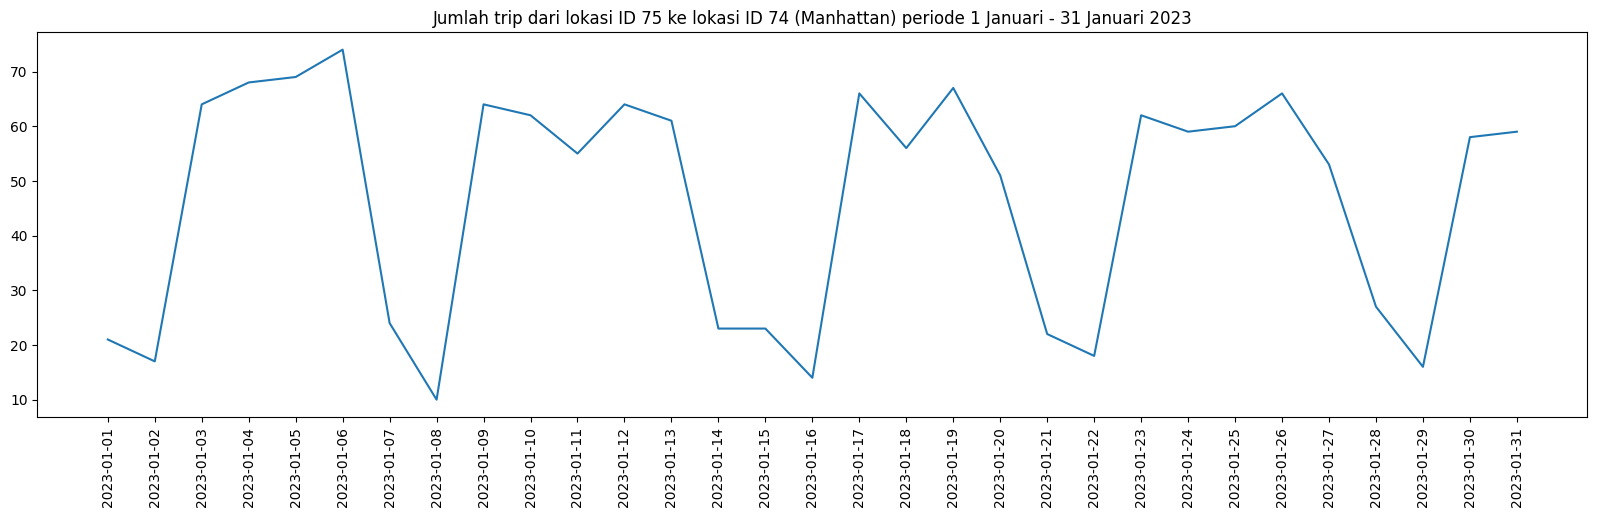

In [455]:
#Line Plot dari jumlah perjalanan (trip) dari lokasi ID 75 ke lokasi ID 74 (Manhattan) selama 1 Bulan
LP75= M75_74[['trip_datename', 'trip_dayname']].groupby('trip_datename').count().reset_index()

plt.figure(figsize=(20,5))

plt.plot(
    LP75['trip_datename'],
    LP75['trip_dayname']
)

plt.xticks(ticks=LP75['trip_datename'], rotation=90)     


plt.title('Jumlah trip dari lokasi ID 75 ke lokasi ID 74 (Manhattan) periode 1 Januari - 31 Januari 2023');

Rata2 jumlah trip dari 75 ke 74 tiap harinya 1453/31= 46,87 ≈ 47
Hari dengan jumlah trip diatas rata2:
Minggu Pertama: Selasa-Jumat
Minggu Kedua : Senin-Jumat
Minggu Ketiga : Selasa-Jumat
Minggu Keempat : Senin-Jumat
Minggu kelima: Senin-Selasa

In [456]:
#Tabel jumlah trip dari lokasi ID 75 ke lokasi ID 74 (Manhattan)
#berdasarkan kategori hari (weekday dan weekend) dan kategori jam (tabel kontigensi)

M75_74[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)

trip_time_period,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
trip_dayname_cat,,,,
Weekday,120,709,81,359
Weekend,15,67,22,80


<Axes: xlabel='trip_dayname_cat'>

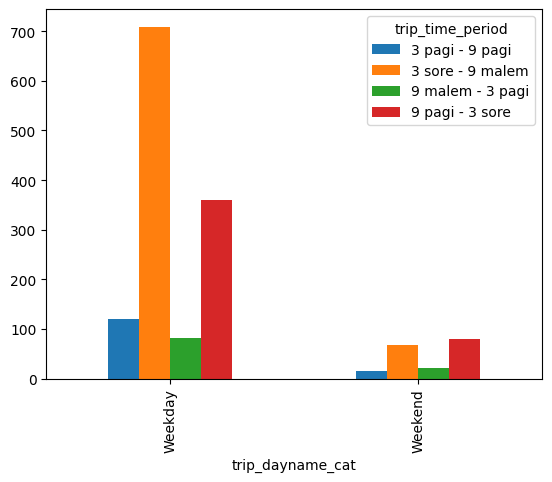

In [457]:
BC2=M75_74[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)
BC2.plot(kind='bar') 
#Berikut BarPlot Count dengan Sumbu Y menyatakan Jumlah Trip

Dugaan awal berdasarkan tabel Kontigensi dan barplot count diatas, jumlah trip terbanyak selama bulan Januari saat supir taksi mulai mengantarkan penumpang dari lokasi ID 75 ke lokasi ID 74 (Manhattan) lokasi terjadi di waktu jam 9 pagi - 3 sore dan 3 sore - 9 malam. Saat weekdays jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam, sedangkan saat weekend jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam.

In [458]:
#Tabel Peluang Supir taksi mendapatkan pesanan pada kondisi tertentu
A=np.array([[120,709,81,359],[15,67,22,80]])
Be=np.array([[1/1453],[1/1453]])
D75=A*Be
C=pd.DataFrame(
    D75, columns=['3 pagi - 9 pagi', '3 sore - 9 malem', '9 malem - 3 pagi', '9 pagi - 3 sore'],
    index=['Weekday','Weekend'])
C

,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
Weekday,0.082588,0.487956,0.055747,0.247075
Weekend,0.010323,0.046111,0.015141,0.055058


Perhatikan bahwa peluang supir taksi mendapatkan pesanan dari A ke B dan mendapatkan pesanan dari B ke A dapat dihitung dengan mengalikan peluang dua kejadian tersebut. Dengan cara yang sama, peluang supir taksi mendapatkan pesanan dari lokasi ID 75 ke 74 dan mendapatkan pesanan dari lokasi ID 74 ke 75 pada kondisi tertentu yang sama, dapat dilihat pada tabel berikut: 

In [459]:
#Tabel Peluang Supir taksi mendapatkan pesanan dari lokasi ID 74 ke 75 dan pesanan dari lokasi ID 75 ke 74 pada kondisi tertentu

DD=D74.reshape(1,8)*D75.reshape(1,8)
DDM=DD.reshape(2,4)
C=pd.DataFrame(
    DDM, columns=['3 pagi - 9 pagi', '3 sore - 9 malem', '9 malem - 3 pagi', '9 pagi - 3 sore'],
    index=['Weekday','Weekend'])
C

,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
Weekday,0.028286,0.083928,0.001199,0.076346
Weekend,0.000201,0.003043,0.000257,0.002891


##### Wilayah Queens

In [460]:
#Trip perjalanan titik 95-95 di wilayah Queens
Q95_95=Q[Q.PUDO=='95-95']
Q95_95

,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone,trip_dayname,trip_time_period,PUDO,trip_dayname_cat,trip_datename
46,2,2023-01-01 01:00:08,2023-01-01 01:05:46,338.0,1.0,95,95,1.0,1.26,8.60,1.0,0.5,2.22,0.0,1.0,...,1.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,95-95,Weekend,2023-01-01
167,2,2023-01-01 02:09:49,2023-01-01 02:16:19,390.0,1.0,95,95,1.0,1.33,9.30,1.0,0.5,0.00,0.0,1.0,...,1.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,95-95,Weekend,2023-01-01
518,2,2023-01-01 12:46:53,2023-01-01 12:51:14,261.0,1.0,95,95,1.0,0.74,6.50,0.0,0.5,1.60,0.0,1.0,...,1.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,95-95,Weekend,2023-01-01
632,2,2023-01-01 14:48:41,2023-01-01 14:56:53,492.0,1.0,95,95,1.0,1.21,9.30,0.0,0.5,2.00,0.0,1.0,...,1.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,95-95,Weekend,2023-01-01
660,2,2023-01-01 14:43:54,2023-01-01 14:51:16,442.0,1.0,95,95,1.0,0.99,8.60,0.0,0.5,0.00,0.0,1.0,...,1.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,7. Minggu,9 pagi - 3 sore,95-95,Weekend,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63013,2,2023-01-31 23:00:12,2023-01-31 23:10:08,596.0,1.0,95,95,1.0,1.39,11.40,1.0,0.5,4.17,0.0,1.0,...,1.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,2. Selasa,9 malem - 3 pagi,95-95,Weekday,2023-01-31
65311,2,2023-01-18 09:10:00,2023-01-18 09:18:00,480.0,1.0,95,95,1.0,1.15,7.02,0.0,0.0,0.00,0.0,1.0,...,3.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,3. Rabu,9 pagi - 3 sore,95-95,Weekday,2023-01-18
65462,2,2023-01-19 09:51:00,2023-01-19 09:58:00,420.0,1.0,95,95,1.0,0.68,12.02,0.0,0.0,1.30,0.0,1.0,...,3.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,4. Kamis,9 pagi - 3 sore,95-95,Weekday,2023-01-19
66172,2,2023-01-23 16:19:00,2023-01-23 16:25:00,360.0,1.0,95,95,1.0,0.93,12.02,0.0,0.0,2.60,0.0,1.0,...,3.0,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,Forest Hills - Forest Hills,Queens - Queens,Boro Zone - Boro Zone,1. Senin,3 sore - 9 malem,95-95,Weekday,2023-01-23


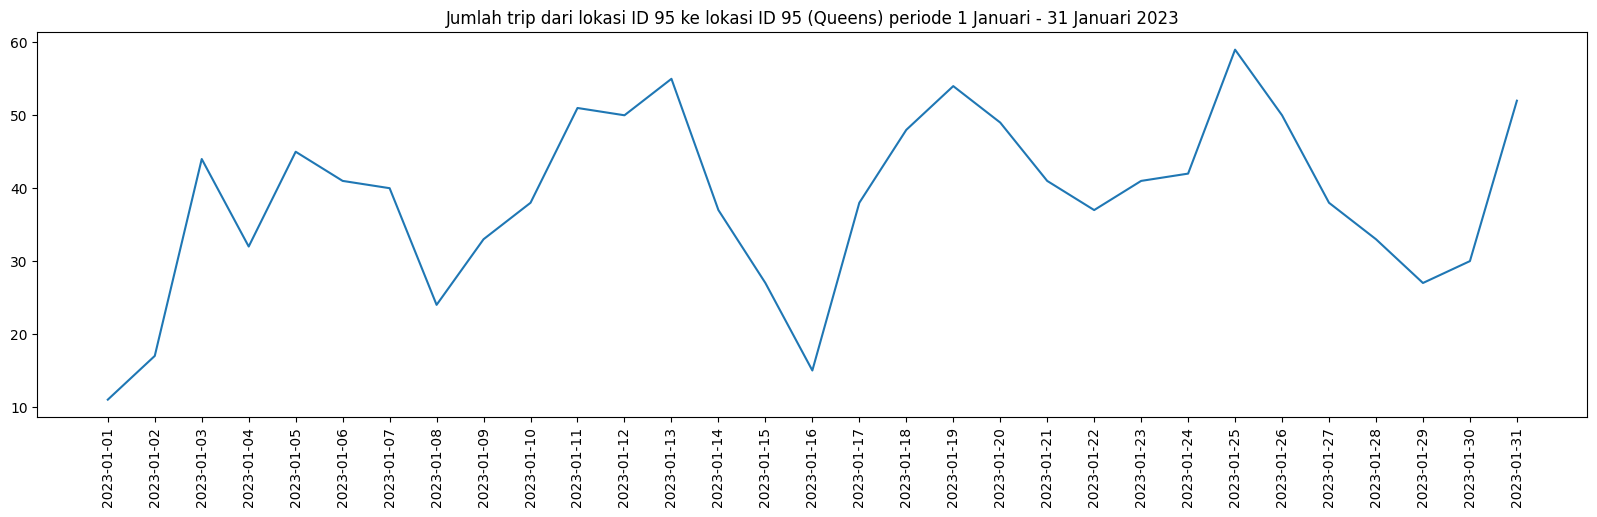

In [461]:
#Line Plot dari jumlah perjalanan (trip) dari lokasi ID 95 ke lokasi ID 95 (Queens) selama 1 Bulan
LP95= Q95_95[['trip_datename', 'trip_dayname']].groupby('trip_datename').count().reset_index()

plt.figure(figsize=(20,5))

plt.plot(
    LP95['trip_datename'],
    LP95['trip_dayname']
)

plt.xticks(ticks=LP95['trip_datename'], rotation=90)     


plt.title('Jumlah trip dari lokasi ID 95 ke lokasi ID 95 (Queens) periode 1 Januari - 31 Januari 2023');

Rata-rata jumlah trip dari titik lokasi tersebut per harinya 1199/31= 38,67 ≈ 39
Hari dengan jumlah trip diatas rata-rata:
Minggu Pertama: Selasa Kamis Jumat Sabtu
Minggu Kedua :  Rabu Kamis Jumat
Minggu Ketiga :  Rabu Kamis Jumat Sabtu
Minggu Keempat :  Senin Selasa Rabu Kamis
Minggu kelima: Selasa

In [462]:
#Tabel jumlah trip dari lokasi ID 95 ke lokasi ID 95 (Queens)
#berdasarkan kategori hari (weekday dan weekend) dan kategori jam (tabel kontigensi)

Q95_95[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)

trip_time_period,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
trip_dayname_cat,,,,
Weekday,58,457,197,210
Weekend,20,128,69,60


<Axes: xlabel='trip_dayname_cat'>

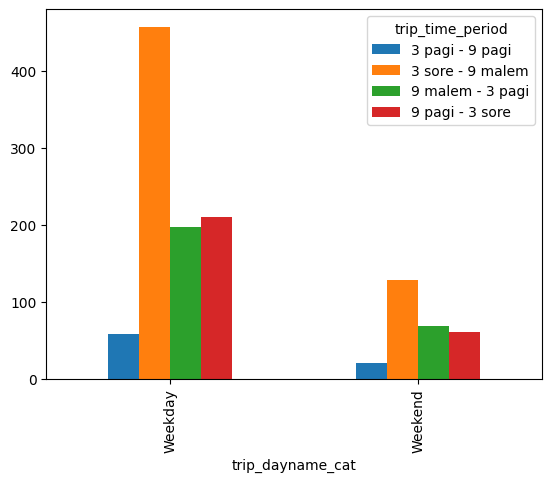

In [463]:
BC3=Q95_95[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)
BC3.plot(kind='bar') 
#Berikut BarPlot Count dengan Sumbu Y menyatakan Jumlah Trip

Dugaan awal berdasarkan tabel Kontigensi dan barplot count diatas, jumlah trip terbanyak selama bulan Januari saat supir taksi mulai mengantarkan penumpang dari lokasi ID 95 ke lokasi ID 95 (Queens) terjadi di waktu jam 9 pagi - 3 sore dan 3 sore - 9 malam. Saat weekdays jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam, sedangkan saat weekend jumlah trip terbanyak terjadi di waktu jam 3 sore-9 malam dan 9 malam-3 pagi.

In [464]:
#Tabel Peluang Supir taksi mendapatkan pesanan pada kondisi tertentu

A=np.array([[58,457,197,210],[20,128,69,60]])
Be=np.array([[1/1199],[1/1199]])
D=A*Be
C=pd.DataFrame(
    D, columns=['3 pagi - 9 pagi', '3 sore - 9 malem', '9 malem - 3 pagi', '9 pagi - 3 sore'],
    index=['Weekday','Weekend'])
C

,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
Weekday,0.048374,0.381151,0.164304,0.175146
Weekend,0.016681,0.106756,0.057548,0.050042


##### Wilayah Brooklyn

In [465]:
#Trip perjalanan titik 97-49 di wilayah Brooklyn
B97_49=B[B.PUDO=='97-49']
B97_49


,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone,trip_dayname,trip_time_period,PUDO,trip_dayname_cat,trip_datename
1053,2,2023-01-01 19:02:02,2023-01-01 19:11:15,553.0,1.0,97,49,1.0,1.52,10.7,0.0,0.5,3.66,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,7. Minggu,3 sore - 9 malem,97-49,Weekend,2023-01-01
1183,2,2023-01-01 21:32:38,2023-01-01 21:39:15,397.0,1.0,97,49,1.0,1.51,7.0,0.5,0.5,1.00,0.0,0.3,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,7. Minggu,9 malem - 3 pagi,97-49,Weekend,2023-01-01
1446,1,2023-01-02 09:57:45,2023-01-02 10:04:29,404.0,1.0,97,49,1.0,1.10,7.9,0.0,1.5,1.85,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,9 pagi - 3 sore,97-49,Weekday,2023-01-02
1601,1,2023-01-02 11:49:55,2023-01-02 11:57:55,480.0,1.0,97,49,1.0,1.30,8.6,0.0,1.5,2.00,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,9 pagi - 3 sore,97-49,Weekday,2023-01-02
1682,2,2023-01-02 12:32:36,2023-01-02 12:40:48,492.0,1.0,97,49,1.0,1.34,10.0,0.0,0.5,2.88,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,9 pagi - 3 sore,97-49,Weekday,2023-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62145,2,2023-01-31 16:04:19,2023-01-31 16:18:55,876.0,1.0,97,49,1.0,1.20,11.4,2.5,0.5,0.00,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-49,Weekday,2023-01-31
62495,2,2023-01-31 18:26:21,2023-01-31 18:39:09,768.0,1.0,97,49,1.0,1.50,12.8,2.5,0.5,0.20,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-49,Weekday,2023-01-31
62519,2,2023-01-31 18:06:15,2023-01-31 18:11:56,341.0,1.0,97,49,1.0,0.77,7.2,2.5,0.5,2.24,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-49,Weekday,2023-01-31
62526,2,2023-01-31 18:05:35,2023-01-31 18:14:40,545.0,1.0,97,49,1.0,1.15,9.3,2.5,0.5,1.33,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,Fort Greene - Clinton Hill,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-49,Weekday,2023-01-31


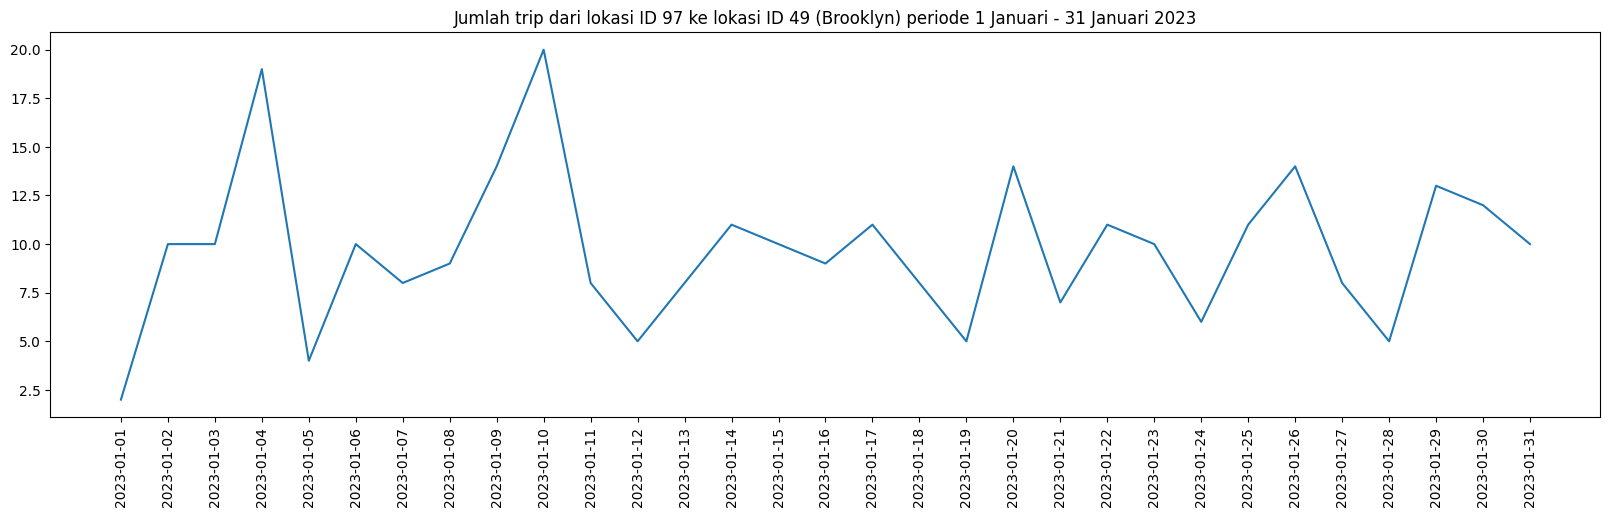

In [466]:
#Line Plot dari jumlah perjalanan (trip) dari lokasi ID 97 ke lokasi ID 49 (Brooklyn) selama 1 Bulan
LP97= B97_49[['trip_datename', 'trip_dayname']].groupby('trip_datename').count().reset_index()

plt.figure(figsize=(20,5))

plt.plot(
    LP97['trip_datename'],
    LP97['trip_dayname']
)

plt.xticks(ticks=LP97['trip_datename'], rotation=90)     


plt.title('Jumlah trip dari lokasi ID 97 ke lokasi ID 49 (Brooklyn) periode 1 Januari - 31 Januari 2023');

Rata-rata jumlah trip dari titik lokasi tersebut per harinya 302/31= 9,74 ≈ 10 trip
Hari dengan jumlah trip diatas rata-rata:
Minggu Pertama: Rabu
Minggu Kedua :  Senin Selasa Sabtu
Minggu Ketiga :  Selasa Jumat
Minggu Keempat :  Minggu Rabu Kamis
Minggu kelima: Minggu Senin


In [467]:
#Tabel jumlah trip dari lokasi ID 97 ke lokasi ID 49 (Brooklyn)
#berdasarkan kategori hari (weekday dan weekend) dan kategori jam (tabel kontigensi)

X=B97_49[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)
X.fillna(0,inplace=True)
X

trip_time_period,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
trip_dayname_cat,,,,
Weekday,1.0,142.0,11.0,72.0
Weekend,0.0,37.0,3.0,36.0


<Axes: xlabel='trip_dayname_cat'>

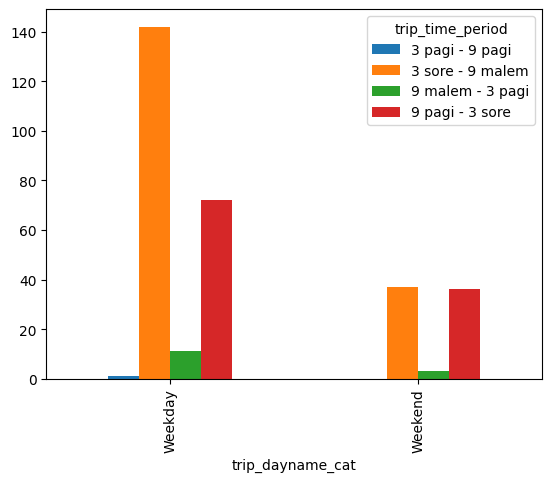

In [468]:
X.plot(kind='bar') 
#Berikut BarPlot Count dengan Sumbu Y menyatakan Jumlah Trip

Dugaan awal berdasarkan tabel Kontigensi dan barplot count diatas, jumlah trip terbanyak selama bulan Januari saat supir taksi mulai mengantarkan penumpang dari lokasi ID 97 ke lokasi ID 49 (Brooklyn) terjadi di waktu jam 9 pagi - 3 sore dan 3 sore - 9 malam. Saat weekdays jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam, sedangkan saat weekend jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam.

In [469]:
#Tabel Peluang Supir taksi mendapatkan pesanan pada kondisi tertentu

A=np.array([[1,142,11,72],[0,37,3,36]])
Be=np.array([[1/302],[1/302]])
D=A*Be
C=pd.DataFrame(
    D, columns=['3 pagi - 9 pagi', '3 sore - 9 malem', '9 malem - 3 pagi', '9 pagi - 3 sore'],
    index=['Weekday','Weekend'])
C

,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
Weekday,0.003311,0.470199,0.036424,0.238411
Weekend,0.000000,0.122517,0.009934,0.119205


In [470]:
#Trip perjalanan titik 97-97 di wilayah Brooklyn
B97_97=B[B.PUDO=='97-97']
B97_97


,VendorID,pickup_datetime,dropoff_datetime,trip_duration_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_zone,trip_borough,trip_service_zone,trip_dayname,trip_time_period,PUDO,trip_dayname_cat,trip_datename
1739,2,2023-01-02 13:03:44,2023-01-02 13:10:22,398.0,1.0,97,97,1.0,0.81,7.90,0.0,0.5,1.88,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,9 pagi - 3 sore,97-97,Weekday,2023-01-02
1827,1,2023-01-02 13:35:13,2023-01-02 13:42:43,450.0,1.0,97,97,1.0,1.10,7.90,0.0,1.5,2.00,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,9 pagi - 3 sore,97-97,Weekday,2023-01-02
1832,2,2023-01-02 13:42:26,2023-01-02 13:49:54,448.0,1.0,97,97,1.0,1.19,9.30,0.0,0.5,2.16,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,9 pagi - 3 sore,97-97,Weekday,2023-01-02
2147,2,2023-01-02 16:02:54,2023-01-02 16:06:36,222.0,1.0,97,97,1.0,0.55,5.80,0.0,0.5,1.46,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,3 sore - 9 malem,97-97,Weekday,2023-01-02
2285,2,2023-01-02 17:06:58,2023-01-02 17:15:26,508.0,1.0,97,97,1.0,1.08,9.30,0.0,0.5,2.70,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,1. Senin,3 sore - 9 malem,97-97,Weekday,2023-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,1,2023-01-31 15:00:33,2023-01-31 15:03:03,150.0,1.0,97,97,1.0,0.40,4.40,0.0,1.5,0.00,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-97,Weekday,2023-01-31
62075,2,2023-01-31 16:48:28,2023-01-31 16:57:16,528.0,1.0,97,97,2.0,0.84,9.30,2.5,0.5,2.50,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-97,Weekday,2023-01-31
62246,2,2023-01-31 17:48:04,2023-01-31 17:55:16,432.0,1.0,97,97,2.0,1.00,8.60,2.5,0.5,0.00,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,3 sore - 9 malem,97-97,Weekday,2023-01-31
62871,2,2023-01-31 21:06:44,2023-01-31 21:13:03,379.0,1.0,97,97,1.0,0.70,7.20,1.0,0.5,0.00,0.0,1.0,...,1.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone,Fort Greene - Fort Greene,Brooklyn - Brooklyn,Boro Zone - Boro Zone,2. Selasa,9 malem - 3 pagi,97-97,Weekday,2023-01-31


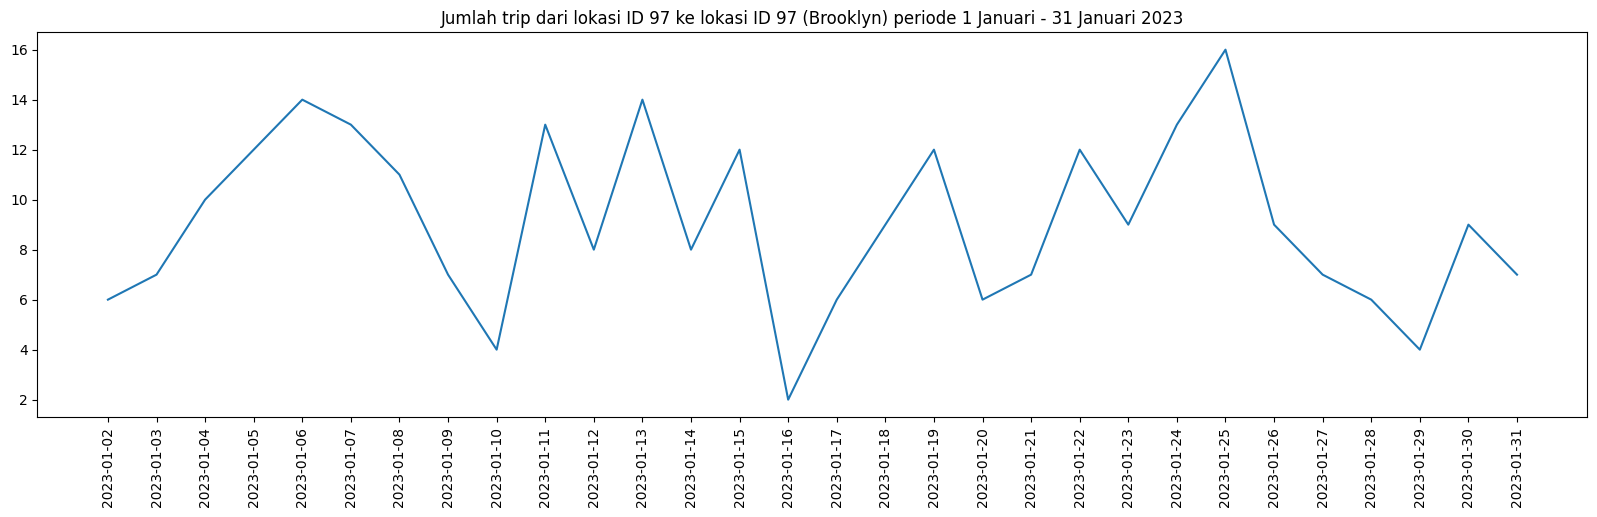

In [471]:
#Line Plot dari jumlah perjalanan (trip) dari lokasi ID 97 ke lokasi ID 97 (Brooklyn) selama 1 Bulan
LP97= B97_97[['trip_datename', 'trip_dayname']].groupby('trip_datename').count().reset_index()

plt.figure(figsize=(20,5))

plt.plot(
    LP97['trip_datename'],
    LP97['trip_dayname']
)

plt.xticks(ticks=LP97['trip_datename'], rotation=90)     


plt.title('Jumlah trip dari lokasi ID 97 ke lokasi ID 97 (Brooklyn) periode 1 Januari - 31 Januari 2023');

Rata-rata jumlah trip dari titik lokasi tersebut per harinya 273/31= 8,8 ≈ 9 trip
Hari dengan jumlah trip diatas rata-rata:
Minggu Pertama: Rabu Kamis Jumat Sabtu
Minggu Kedua :  Minggu Rabu Jumat
Minggu Ketiga :  Minggu Kamis
Minggu Keempat :  Minggu Selasa Rabu
Minggu kelima: tidak ada


In [472]:
#Tabel jumlah trip dari lokasi ID 97 ke lokasi ID 97 (Brooklyn)
#berdasarkan kategori hari (weekday dan weekend) dan kategori jam (tabel kontigensi)

X=B97_97[['trip_dayname_cat', 'trip_time_period']].pivot_table(
    index='trip_dayname_cat',
    columns='trip_time_period',
    values='trip_dayname_cat',
    aggfunc=len
)
X.fillna(0,inplace=True)
X

trip_time_period,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
trip_dayname_cat,,,
Weekday,111,17,72
Weekend,36,7,30


<Axes: xlabel='trip_dayname_cat'>

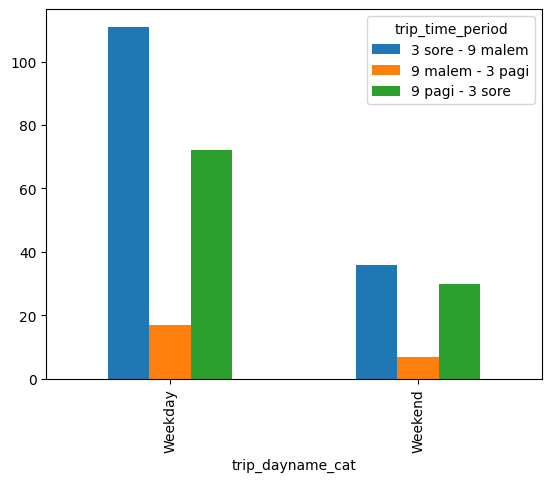

In [473]:
X.plot(kind='bar') 
#Berikut BarPlot Count dengan Sumbu Y menyatakan Jumlah Trip

Dugaan awal berdasarkan tabel Kontigensi dan barplot count diatas, jumlah trip terbanyak selama bulan Januari saat supir taksi mulai mengantarkan penumpang dari lokasi ID 97 ke lokasi ID 97 (Brooklyn) terjadi di waktu jam 9 pagi - 3 sore dan 3 sore - 9 malam. Saat weekdays jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam, sedangkan saat weekend jumlah trip terbanyak terjadi di waktu jam 9 pagi- 3 sore dan 3 sore-9 malam.

In [474]:
#Tabel Peluang Supir taksi mendapatkan pesanan pada kondisi tertentu

A=np.array([[0,111,17,72],[0,36,7,30]])
Be=np.array([[1/273],[1/273]])
D=A*Be
C=pd.DataFrame(
    D, columns=['3 pagi - 9 pagi', '3 sore - 9 malem', '9 malem - 3 pagi', '9 pagi - 3 sore'],
    index=['Weekday','Weekend'])
C

,3 pagi - 9 pagi,3 sore - 9 malem,9 malem - 3 pagi,9 pagi - 3 sore
Weekday,0.0,0.406593,0.062271,0.263736
Weekend,0.0,0.131868,0.025641,0.109890


### `Conclusion`

Memberikan rekomendasi lokasi driver untuk mencari pesanan di wilayah Manhattan yaitu zona lokasi East Harlem South (Location ID 75) dan zona East Harlem North (Location ID 74), dengan peluang tertinggi driver untuk dapat memaksimalkan pesanan yang diterima 'bolak-balik' saat weekdays (hari kerja) jam 9 pagi - 3 sore dan 3 sore - 9 malam.

Memberikan rekomendasi lokasi driver untuk mencari pesanan di wilayah Queens yaitu di zona lokasi Forest Hills (Location ID 95), dengan peluang tertinggi driver untuk dapat memaksimalkan pesanan yang diterima saat weekdays (hari kerja) jam 3 sore - 9 malem.

Memberikan rekomendasi lokasi driver untuk mencari pesanan di wilayah Brooklyn yaitu di zona lokasi Fort Greene (Location ID 97), dengan peluang tertinggi driver untuk dapat memaksimalkan pesanan yang diterima saat weekdays (hari kerja) jam 3 sore - 9 malem.



### `Suggestion`

Untuk penelitan selanjutnya agar hasil analisis lebih spesifik, pada masing-masing tabel kontigensi untuk setiap wilayah (Borough), jumlah trip dapat dikategorikan berdasarkan jenis hari (Senin, Selasa, Rabu, dst) dengan memperlakukan jumlah pengulangan untuk setiap harinya sama, contohnya data perjalanan taksi dalam 1 bulan, kita batasi data perjalanannya menjadi 28 hari pertama berdasarkan waktu dimulainya perjalanan (waktu pickup). Hasil analisis yang didapatkan juga akan memberikan kondisi yang lebih spesifik mengenai peluang driver (supir taksi) dalam mendapatkan pesanan di hari dan jam tertentu. 

In [475]:
# M74_75.to_csv(r'C:\\Users\hp\Documents\\JCDS-0110-017\\Machine Learning\2\\Trip1.csv', index=None, header=True)

In [476]:
# M75_74.to_csv(r'C:\\Users\hp\Documents\\JCDS-0110-017\\Machine Learning\2\\Trip2.csv', index=None, header=True)

In [477]:
# Q95_95.to_csv(r'C:\\Users\hp\Documents\\JCDS-0110-017\\Machine Learning\2\\Trip3.csv', index=None, header=True)

In [478]:
# B97_49.to_csv(r'C:\\Users\hp\Documents\\JCDS-0110-017\\Machine Learning\2\\Trip4.csv', index=None, header=True)

In [479]:
# B97_97.to_csv(r'C:\\Users\hp\Documents\\JCDS-0110-017\\Machine Learning\2\\Trip5.csv', index=None, header=True)